# <font color='blue'>Big Data Real-Time Analytics com Python e Spark</font>

## <font color='blue'>Mini-Projeto 1</font>

### <font color='blue'>Processo de Construção, Treinamento, Avaliação e Seleção de Modelos Para Classificação</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install scikit-learn==1.2.2

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark
!pip install -U matplotlib

  Using cached matplotlib-3.7.1-cp39-cp39-win_amd64.whl (7.6 MB)


In [3]:
# Imports
import joblib
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline
import warnings
# warnings.filterwarnings("ignore")

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Andrew Borges" --iversions

Author: Andrew Borges

joblib    : 1.2.0
sklearn   : 0.0.post1
seaborn   : 0.12.2
matplotlib: 3.7.1
pandas    : 1.5.3
numpy     : 1.22.3



## Carregando o Conjunto de dados

In [5]:
# Carrega os dados
dados = pd.read_csv('dados/dataset.csv')

In [6]:
# Shape
dados.shape

(583, 11)

In [7]:
# Colunas
dados.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [8]:
# Amostra dos dados
dados.sample(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
424,32,Female,0.7,0.1,240,12,15,7.0,3.0,0.7,1
118,32,Male,15.9,7.0,280,1350,1600,5.6,2.8,1.0,1
80,58,Female,2.4,1.1,915,60,142,4.7,1.8,0.6,1
259,42,Male,30.5,14.2,285,65,130,5.2,2.1,0.6,1
438,65,Male,0.8,0.2,162,30,90,3.8,1.4,0.5,1
223,50,Male,1.1,0.3,175,20,19,7.1,4.5,1.7,2
266,62,Male,1.2,0.4,195,38,54,6.3,3.8,1.5,1
99,18,Male,0.7,0.1,312,308,405,6.9,3.7,1.1,1
541,42,Male,0.8,0.2,198,29,19,6.6,3.0,0.8,2
328,43,Male,0.8,0.2,192,29,20,6.0,2.9,0.9,2


## Análise Exploratória de Dados

In [9]:
# Tipos de dados
dados.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [10]:
# Variáveis categóricas
dados.dtypes[dados.dtypes == 'object']

Gender    object
dtype: object

In [11]:
# Variáveis não categóricas
dados.dtypes[dados.dtypes != 'object']

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

### Exploração das variáveis Numéricas

In [12]:
dados.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


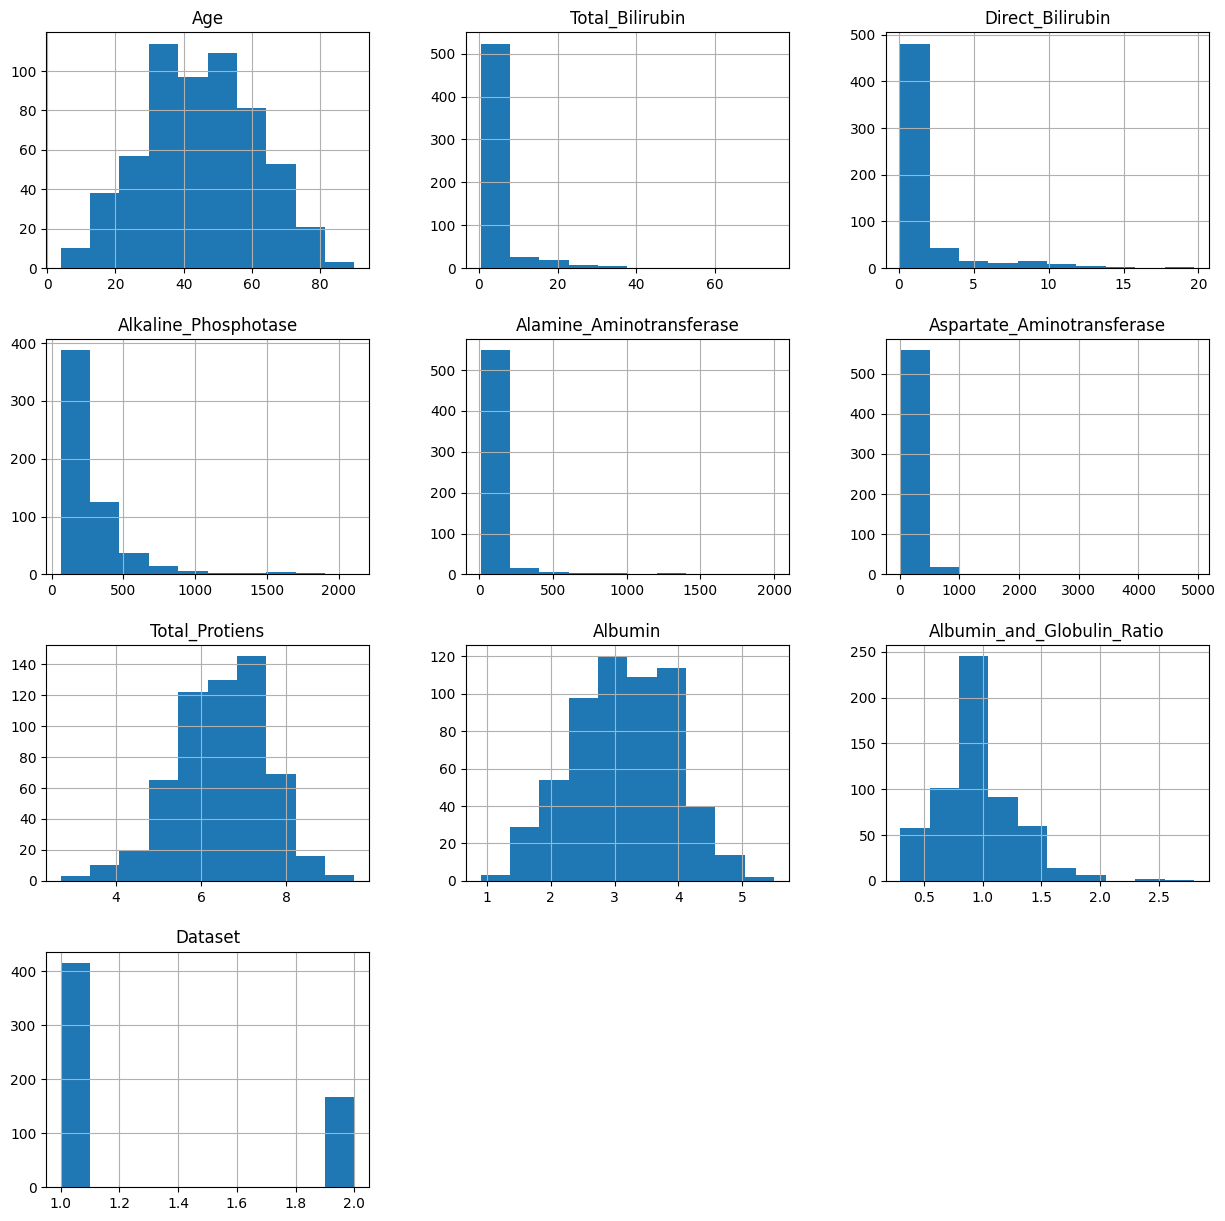

In [13]:
# Plot
dados.hist(figsize = (15, 15), bins = 10)
plt.show()

PArece qeu há outlier nas variáveis **Alamine_aminotransferase, Aspartate_Aminotransferase,** pois o valor máximo é muito mais alto que o valor médio.

A coluna dataset(variável target) tem '1' para doença hepática e '2' para nenhuma doença hepática. Vamos ajustar a variável colocando valores mais fáceis de interpretar. A classe negativa (não tem doença) será zero.

In [14]:
# Função para ajustar a variável targe
def ajusta_var(x):
    if x == 2:
        return 0
    return 1

In [15]:
# Aplica a função
dados['Dataset'] = dados['Dataset'].map(ajusta_var)

In [16]:
# Vamos ajustar o nome da variável target
dados.rename({'Dataset':'Target'}, axis = 'columns', inplace = True)

In [17]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
403,65,Male,0.7,0.2,199,19,22,6.3,3.6,1.3,0
345,60,Male,2.9,1.3,230,32,44,5.6,2.0,0.5,1
507,50,Male,0.9,0.3,194,190,73,7.5,3.9,1.0,1
223,50,Male,1.1,0.3,175,20,19,7.1,4.5,1.7,0
573,32,Male,3.7,1.6,612,50,88,6.2,1.9,0.4,1


In [18]:
# Correlação entre as variáveis
dados.corr()

C:\Users\andrew\AppData\Local\Temp\ipykernel_19112\2442929696.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados.corr()


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131
Target,0.137351,0.220208,0.246046,0.184866,0.163416,0.151934,-0.035008,-0.161388,-0.163131,1.000000


### Exploração da variável categórica

In [19]:
dados.describe(include = ['object'])

,Gender
count,583
unique,2
top,Male
freq,441


Número de pacientes do sexo masculino: 441
Número de pacientes do sexo feminino: 142


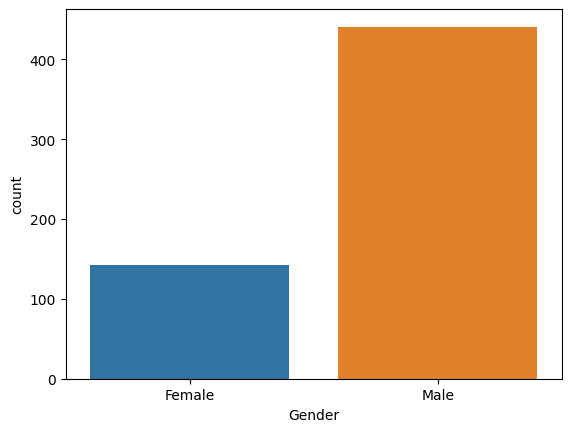

In [20]:
# Plot
sns.countplot(data = dados, x = 'Gender', label = 'Count')

# Value counts
M, F = dados['Gender'].value_counts()

# PRint
print('Número de pacientes do sexo masculino:', M)
print('Número de pacientes do sexo feminino:', F)

Vamos aprovitar e já transformar a variável categórica em sua apresentação numérica usando label encoding. Além de reduzir o trabalho mais tarde, facilitará a criação de gráficos a seguir.

In [21]:
# Função para label encoding
def encoding_func(x):
    if x == 'Male':
        return 0
    return 1

In [22]:
# Aplica a função
dados['Gender'] = dados['Gender'].map(encoding_func)

In [23]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
575,32,0,25.0,13.7,560,41,88,7.9,2.5,2.5,1
401,50,0,7.3,3.7,92,44,236,6.8,1.6,0.3,1
269,26,0,0.6,0.1,110,15,20,2.8,1.6,1.3,1
232,50,0,2.7,1.6,157,149,156,7.9,3.1,0.6,1
528,45,0,1.7,0.8,315,12,38,6.3,2.1,0.5,1


### Verificando a Relação Entre Atributos

In [24]:
dados.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


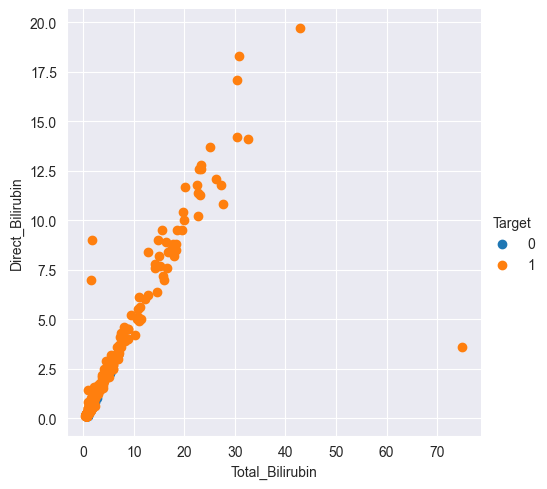

In [25]:
# Define o estilo do background
sns.set_style('darkgrid')

# Facetgrid
sns.FacetGrid(dados, hue = 'Target', height = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

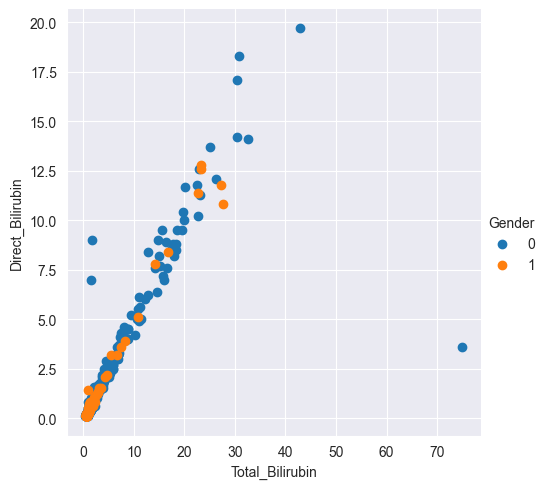

In [26]:
# Define o estilo do background
sns.set_style('darkgrid')

# Facetgrid
sns.FacetGrid(dados, hue = 'Gender', height = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

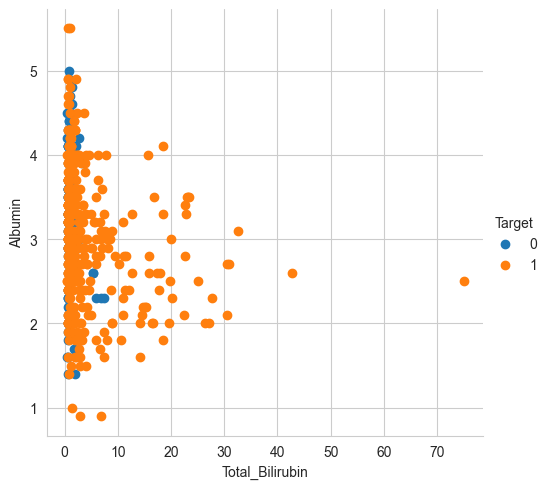

In [27]:
# Define o estilo do background
sns.set_style('whitegrid')

# Facetgrid
sns.FacetGrid(dados, hue = 'Target', height = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

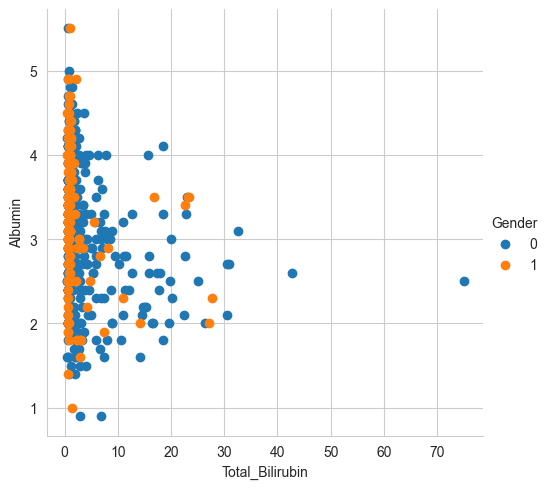

In [28]:
# Define o estilo do background
sns.set_style('whitegrid')

# Facetgrid
sns.FacetGrid(dados, hue = 'Gender', height = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

### Verificando Valores AUsentes e Registros Duplicados

In [29]:
# Verificando valores ausentes
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [31]:
# Verificando registros duplicados (complete cases)
dados[dados.duplicated(keep = False)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
18,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
34,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
54,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1


## Limpeza de Dados

### Tratamento e Registros Duplicados

In [32]:
dados.shape

(583, 11)

In [33]:
# Remove registros duplicados (remove uma das duplicatas)
dados = dados.drop_duplicates()
print(dados.shape)

(570, 11)


### Tratamento de Outliers

In [34]:
dados.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,566.000000,570.000000
mean,44.849123,0.245614,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,0.712281
std,16.242182,0.430829,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.319635,0.453097
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


<Axes: xlabel='Alamine_Aminotransferase'>

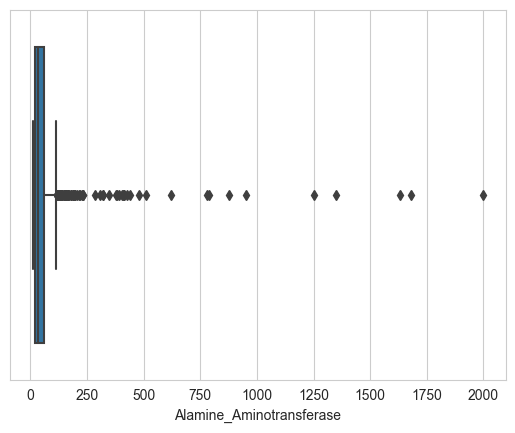

In [44]:
# Boxplot
sns.boxplot(x = dados.Alamine_Aminotransferase)

Será que os valores externos são mesmo outliers?

In [37]:
# Contagem de frequência por valor
dados.Alamine_Aminotransferase.sort_values(ascending = False).head()

117    2000
27     1680
47     1630
118    1350
135    1250
Name: Alamine_Aminotransferase, dtype: int64

<Axes: xlabel='Aspartate_Aminotransferase'>

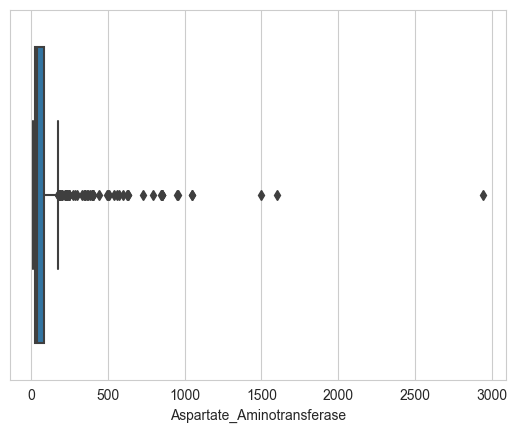

In [43]:
# Boxplot
sns.boxplot(x = dados.Aspartate_Aminotransferase)

In [39]:
# Contagem de frequência por valor
dados.Aspartate_Aminotransferase.sort_values(ascending = False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [40]:
# Mantém somente os registros onde o valor for menor ou igual a 3000
dados = dados[dados.Aspartate_Aminotransferase <= 3000]
dados.shape

(569, 11)

<Axes: xlabel='Aspartate_Aminotransferase'>

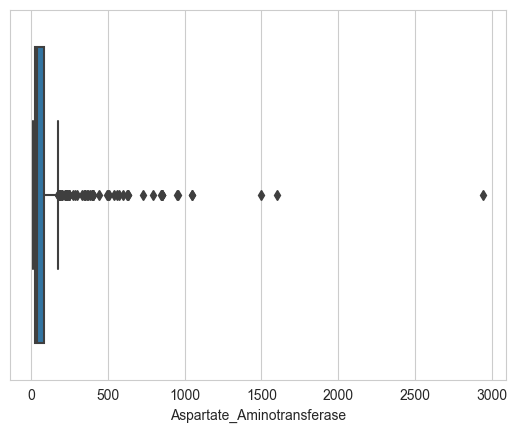

In [42]:
# Boxplot
sns.boxplot(x = dados.Aspartate_Aminotransferase)

In [46]:
# Contagem de frequência por valor
dados.Aspartate_Aminotransferase.sort_values(ascending = False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [47]:
# Mantém somente os registros onde o valor for menor ou igual a 2500
dados = dados[dados.Aspartate_Aminotransferase <= 2500]
dados.shape

(568, 11)

In [48]:
dados.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,564.000000,568.000000
mean,44.834507,0.246479,3.291197,1.482042,290.482394,74.286972,95.901408,6.496831,3.150000,0.948174,0.711268
std,16.237569,0.431340,6.257583,2.826056,243.271522,155.240601,171.956479,1.089500,0.797571,0.319301,0.453573
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,175.750000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,1680.000000,1600.000000,9.600000,5.500000,2.800000,1.000000


### Tratamento de Valores Ausente

In [49]:
# Verifica se há valor ausente
dados.isnull().values.any()

True

In [62]:
# Verifica quantas colunas tem valor ausente
dados.isnull().values.any().sum()

0

In [55]:
# Lista os valores ausentes
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [56]:
dados.shape

(568, 11)

In [58]:
# Drop dos registros com valores ausentes em qualquer coluna (any)
dados = dados.dropna(how = 'any')

In [59]:
dados.shape

(564, 11)

In [60]:
# Lista os valores ausentes
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target


In [61]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
211,42,0,2.7,1.3,219,60,180,7.0,3.2,0.80,1
495,32,0,0.7,0.2,165,31,29,6.1,3.0,0.96,0
549,40,1,2.1,1.0,768,74,141,7.8,4.9,1.60,1
575,32,0,25.0,13.7,560,41,88,7.9,2.5,2.50,1
94,60,0,5.2,2.4,168,126,202,6.8,2.9,0.70,1


## Pré-Processamento de Dados Para Construção de Modelos de Machine Learning

In [63]:
# Data e alta correlação entre as variáveis Direct_Bilirubin e Total_Bilirubin, vamos remover Direct_BIlirubin
dados = dados.drop('Direct_Bilirubin', 1)

C:\Users\andrew\AppData\Local\Temp\ipykernel_19112\2416301536.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dados = dados.drop('Direct_Bilirubin', 1)


In [64]:
dados.shape

(564, 10)

### Divisão em Treino e Teste

In [65]:
# Cria um objeto separado para a variável target
y = dados.Target

In [66]:
# Cria um objeto separado para as variáveis de entrada
X = dados.drop('Target', axis = 1)

In [67]:
# Split em dados de treino e teste com amostragem estratificada
X_treino, X_teste, y_treino, y_teste = train_test_split(X,
                                                       y,
                                                       test_size = 0.25,
                                                       random_state = 1234,
                                                       stratify = dados.Target)

In [68]:
len(X_treino)

423

In [69]:
len(X_teste)

141

In [70]:
# Print do shape
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

(423, 9) (141, 9) (423,) (141,)


In [71]:
X_treino.head(2)

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
205,45,0,2.5,163,28,22,7.6,4.0,1.1
390,72,0,0.8,148,23,35,6.0,3.0,1.0


### Balanceamento de Classe

In [72]:
y_treino.value_counts()

1    301
0    122
Name: Target, dtype: int64

In [73]:
# Instala o pacote
!pip install -q imblearn

In [74]:
# Carrega a função SMOTE
import imblearn
from imblearn.over_sampling import SMOTE

In [75]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Andrew Borges" --iversions

Author: Andrew Borges

joblib    : 1.2.0
imblearn  : 0.0
sklearn   : 0.0.post1
seaborn   : 0.12.2
matplotlib: 3.7.1
pandas    : 1.5.3
numpy     : 1.22.3



In [76]:
# Vamos aplicar a técnica de oversampling  e aumentar o número de exemplos de classe minoritária
over_sampler = SMOTE(k_neighbors = 2)

Explique porquê o balanceamento de classe é feito somente com ddados de treino.

In [77]:
# Aplica o oversampling (deve ser feito somente com dados de treino)
X_res, y_res = over_sampler.fit_resample(X_treino, y_treino)

In [78]:
len(X_res)

602

In [79]:
len(y_res)

602

In [80]:
y_res.value_counts()

1    301
0    301
Name: Target, dtype: int64

In [81]:
# Ajusta o nome do dataset de treino para X
X_treino = X_res

In [82]:
# Ajusta o nome do dataset de treino para y
y_treino = y_res

### Padronização do Dados

In [84]:
X_treino.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,45,0,2.5,163,28,22,7.6,4.0,1.1
1,72,0,0.8,148,23,35,6.0,3.0,1.0
2,18,0,0.8,282,72,140,5.5,2.5,0.8
3,42,0,8.9,272,31,61,5.8,2.0,0.5
4,42,0,0.8,127,29,30,4.9,2.7,1.2


In [83]:
# Calculamos média e desvio padrão dos dados de treino
treino_mean = X_treino.mean()
treino_std = X_treino.std()
print(treino_mean)
print(treino_std)

Age                            43.307309
Gender                          0.219269
Total_Bilirubin                 2.678847
Alkaline_Phosphotase          265.210963
Alamine_Aminotransferase       62.543189
Aspartate_Aminotransferase     78.008306
Total_Protiens                  6.525609
Albumin                         3.240434
Albumin_and_Globulin_Ratio      0.992749
dtype: float64
Age                            16.262619
Gender                          0.414095
Total_Bilirubin                 5.560960
Alkaline_Phosphotase          217.870851
Alamine_Aminotransferase      140.042395
Aspartate_Aminotransferase    144.175601
Total_Protiens                  1.032048
Albumin                         0.764817
Albumin_and_Globulin_Ratio      0.305191
dtype: float64


In [85]:
# Padronização
X_treino = (X_treino - treino_mean) / treino_std

In [86]:
X_treino.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.104085,-0.529513,-0.032161,-0.469136,-0.246662,-0.388473,1.041028,0.993134,0.351421
1,1.764334,-0.529513,-0.337864,-0.537984,-0.282366,-0.298305,-0.509287,-0.314368,0.023758
2,-1.556164,-0.529513,-0.337864,0.077060,0.067528,0.429974,-0.993761,-0.968119,-0.631569
3,-0.080387,-0.529513,1.118719,0.031161,-0.225240,-0.117969,-0.703077,-1.621870,-1.614560
4,-0.080387,-0.529513,-0.337864,-0.634371,-0.239522,-0.332985,-1.575129,-0.706618,0.679085


In [87]:
# Describe
X_treino.describe()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,602.000000,6.020000e+02,6.020000e+02,6.020000e+02
mean,-7.081821e-17,5.901518e-17,2.360607e-17,-3.540911e-17,1.180304e-17,0.000000,-6.653961e-16,2.360607e-17,1.298334e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.417034e+00,-5.295135e-01,-4.097937e-01,-9.281231e-01,-3.751949e-01,-0.471705,-3.706812e+00,-3.060121e+00,-2.269887e+00
25%,-7.567852e-01,-5.295135e-01,-3.434395e-01,-4.266792e-01,-2.895065e-01,-0.374601,-6.061819e-01,-7.066183e-01,-6.315695e-01
50%,1.040848e-01,-5.295135e-01,-3.168289e-01,-3.084899e-01,-2.180996e-01,-0.284433,7.208089e-02,-5.286746e-02,2.375758e-02
75%,7.189919e-01,-5.295135e-01,-1.407390e-01,4.148805e-02,-7.528570e-02,-0.076353,6.534490e-01,8.607497e-01,5.480192e-01
max,2.871167e+00,1.885389e+00,1.300516e+01,8.467351e+00,1.154977e+01,10.556514,2.978921e+00,2.954387e+00,5.921701e+00


Explique porque usamos média e desvio dos dados de treino para padronizar os dados de teste

In [88]:
# Usamos média e desvio de treino para padronizar o conjunto de dados de teste
X_teste = (X_teste - treino_mean) / treino_std

In [89]:
# Describe
X_teste.describe()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,0.128071,-0.032831,0.090273,0.113453,0.074922,0.158044,-0.112775,-0.264293,-0.325983
std,0.984723,0.979567,0.997958,1.022136,0.887942,1.282559,1.070356,1.015876,0.897835
min,-2.294053,-0.529513,-0.391811,-0.804196,-0.375195,-0.450897,-3.609917,-3.060121,-2.269887
25%,-0.633804,-0.529513,-0.337864,-0.418647,-0.289507,-0.374601,-0.799971,-0.968119,-0.959233
50%,0.104085,-0.529513,-0.319881,-0.271771,-0.218100,-0.270561,-0.024814,-0.314368,-0.303906
75%,0.903464,-0.529513,-0.050144,0.127548,0.038965,0.083174,0.556554,0.470133,0.023758
max,2.563713,1.885389,5.056888,6.218313,6.337058,9.862915,2.300659,2.169886,2.645066


In [90]:
X_teste.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
220,-0.387841,-0.529513,-0.337864,-0.542574,-0.253803,-0.222009,-1.478234,-0.968119,0.023758
448,0.288557,1.885389,-0.337864,-0.565523,-0.260944,-0.367665,-0.509287,-0.837369,-0.959233
509,0.165575,-0.529513,3.114777,-0.051457,0.553095,3.204368,-1.090655,-0.314368,0.679085
415,1.641352,-0.529513,-0.247951,1.949729,0.217483,-0.263625,-2.834760,-0.706618,-0.959233
56,-0.633804,-0.529513,-0.337864,-0.308490,-0.260944,-0.381537,1.428606,0.993134,0.023758


### Construção, Treinamento e Avaliação do Modelo 1 com Regressão Logística (Benchmark)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Para a primeira versão do modelo o ideal é escolher um algoritmo simples, fácil de compreender e que será usado como Benchmark.

Obs: Como parte do processo envolve aleatoriedade, os resultados podem ser ligeiramente diferentes a cada execução deste jupyter notebook.

In [94]:
# Define lista de hiperparâmetros
tuned_params_v1 = {'C': [0.001, 0.001, 0.1, 1, 10, 100, 1000, 10000],
                  'penalty': ['l1', 'l2']}

In [108]:
# Criamos o modelo com GridSearch
# Vários modelos serão criados com diferentes combinações de hiperparâmetros
modelo_v1 = GridSearchCV(LogisticRegression(),
                        tuned_params_v1,
                        scoring = 'roc_auc',
                        n_jobs = -1)

In [109]:
# Treinamento do modelo
modelo_v1.fit(X_treino, y_treino)

C:\Users\andrew\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\andrew\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\andrew\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\andrew\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
V

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.001, 0.1, 1, 10, 100, 1000, 10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [110]:
# Selecionamos o melhor modelo
modelo_v1.best_estimator_

LogisticRegression(C=1)

In [111]:
# Previsões com dados de teste
y_pred_v1 = modelo_v1.predict(X_teste)

In [112]:
# Mostra as 10 primeiras previsões
y_pred_v1[:10]

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [113]:
# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)

In [114]:
# Mostra as 10 primeiras previsões
y_pred_proba_v1[:10]

array([[7.64663607e-01, 2.35336393e-01],
       [5.40740838e-01, 4.59259162e-01],
       [2.04719127e-04, 9.99795281e-01],
       [5.64929066e-01, 4.35070934e-01],
       [6.78607049e-01, 3.21392951e-01],
       [6.08551635e-01, 3.91448365e-01],
       [7.61904608e-01, 2.38095392e-01],
       [7.46734865e-02, 9.25326514e-01],
       [6.19098405e-01, 3.80901595e-01],
       [7.30285414e-03, 9.92697146e-01]])

In [115]:
# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva
# precisamos disso para calcular a Curva ROC
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)[:, 1]

In [116]:
# Mostra as 10 primeiras previsões
y_pred_proba_v1[:10]

array([0.23533639, 0.45925916, 0.99979528, 0.43507093, 0.32139295,
       0.39144837, 0.23809539, 0.92532651, 0.38090159, 0.99269715])

In [117]:
# Como exemplo, vamos verificar um dos pontos de dados (altere o valor de i se desejar)
i = 16
print('Para o ponto de dados {}, classe real = {}, classe prevista = {}, probabilidade prevista = {}'
     .format(i, y_teste.iloc[i], y_pred_v1[i], y_pred_proba_v1[i]))

Para o ponto de dados 16, classe real = 1, classe prevista = 1, probabilidade prevista = 0.797197707386265


In [118]:
# Matriz de confusão
confusion_matrix(y_teste, y_pred_v1)

array([[33,  7],
       [42, 59]], dtype=int64)

In [119]:
# Extraindo cada valor da CM
tn, fp, fn, tp = confusion_matrix(y_teste, y_pred_v1).ravel()

In [120]:
print(tn, fp, fn, tp)

33 7 42 59


In [121]:
# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v1 = roc_auc_score(y_teste, y_pred_v1)
print(roc_auc_v1)

0.7045792079207921


In [122]:
# Calcula a curva ROC com dados e previsões em teste
fpr_v1, tpr_v1, thresholds = roc_curve(y_teste, y_pred_proba_v1)

In [123]:
# AUC em teste
auc_v1 = auc(fpr_v1, tpr_v1)
print(auc_v1)

0.7482673267326733


In [125]:
# Acurácia em teste
acuracia_v1 = accuracy_score(y_teste, y_pred_v1)
print(acuracia_v1)

0.6524822695035462


### Feature Importance

In [129]:
# Construindo o modelo novamente com os melhores hiperparâmetros
# Isso é necessário pois a versão final não deve ter o GridSearchCV
modelo_v1 = LogisticRegression(C = 1)
modelo_v1.fit(X_treino, y_treino)

LogisticRegression(C=1)

In [130]:
# Obtemos os coeficientes pelo maior usando np.argsort
indices = np.argsort(-abs(modelo_v1.coef_[0, :]))

In [131]:
print("Variáveis mais importantes para o resultado do modelo_v1:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v1:
--------------------------------------------------
Total_Bilirubin
Alamine_Aminotransferase
Aspartate_Aminotransferase
Albumin
Total_Protiens
Alkaline_Phosphotase
Age
Albumin_and_Globulin_Ratio
Gender


In [132]:
# Salva o modelo em disco
with open('modelos/modelo_v1.pkl', 'wb') as pickle_file:
    joblib.dump(modelo_v1, 'modelos/modelo_v1.pkl')

In [133]:
# Cria um dataframe para receber as métricas de cada modelo
df_modelos = pd.DataFrame()

In [134]:
# Dicionário com as métricas do modelo_v1
dict_modelo_v1 = {'Nome': 'modelo_v1',
                  'Algoritmo': 'Regressão Logística',
                  'ROC_AUC Score': roc_auc_v1,
                  'AUC Score': auc_v1,
                  'Acurácia': acuracia_v1}

In [135]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v1, ignore_index= True)

C:\Users\andrew\AppData\Local\Temp\ipykernel_19112\2276574085.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_modelos = df_modelos.append(dict_modelo_v1, ignore_index= True)


In [136]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.704579,0.748267,0.652482


### Construção, Treinamento e Avaliação do Modelo 2 com Random Forest

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Nosso desafio agora é tentar obter um modelo melhor que a versão 1. Vamos tentar o algoritmo Random Forest.

In [137]:
# Grid de hiperparâmetros
tuned_params_v2 = {'n_estimators': [100, 200, 300, 400, 500],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4]}

In [138]:
# Cria o modelo com RandomizedSearchCV para buscar a mlehor combinação de hiperparâmetros
modelo_v2 = RandomizedSearchCV(RandomForestClassifier(),
                              tuned_params_v2,
                              n_iter = 15,
                              scoring = 'roc_auc',
                              n_jobs = -1)

In [139]:
# Treina o modelo
modelo_v2.fit(X_treino, y_treino)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [141]:
# Extrai o melhor modelo
modelo_v2.best_estimator_

RandomForestClassifier(n_estimators=400)

In [142]:
# Previsões em teste
y_pred_v2 = modelo_v2.predict(X_teste)

In [143]:
# Obtém as previsões para a classe positiva
y_pred_proba_v2 = modelo_v2.predict_proba(X_teste)[:, 1]

In [144]:
# Matriz de Consfusão
confusion_matrix(y_teste, y_pred_v2)

array([[18, 22],
       [17, 84]], dtype=int64)

In [145]:
# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v2 = roc_auc_score(y_teste, y_pred_v2)
print(roc_auc_v2)

0.6408415841584157


In [146]:
# Curva ROC nos dados e previsões em teste
fpr_v2, tpr_v2, thresholds = roc_curve(y_teste, y_pred_v2)

In [147]:
# AUC em teste
auc_v2 = auc(fpr_v2, tpr_v2)
print(auc_v2)

0.6408415841584157


In [148]:
# Acurácia em teste
acuracia_v2 = accuracy_score(y_teste, y_pred_v2)
print(acuracia_v2)

0.723404255319149


### Feature Importance

In [149]:
# Recria o modelo com os melhores hiperparâmetros
modelo_v2 = RandomForestClassifier(n_estimators = 400, min_samples_split= 5, min_samples_leaf= 4)
modelo_v2.fit(X_treino, y_treino)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=400)

In [150]:
# Variáveis mais relevantes
indices = np.argsort(-modelo_v2.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v2:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v2:
--------------------------------------------------
Total_Bilirubin
Alkaline_Phosphotase
Aspartate_Aminotransferase
Albumin_and_Globulin_Ratio
Alamine_Aminotransferase
Age
Total_Protiens
Albumin
Gender


In [151]:
# Salva o modelo em disco
with open('modelos/modelo_v2.pkl', 'wb') as pickle_file:
    joblib.dump(modelo_v2, 'modelos/modelo_v2.pkl')

In [152]:
# Dicionário com as métricas do modelo_v2
dict_modelo_v2 = {'Nome': 'modelo_v2',
                 'Algoritmo': 'Random Forest',
                 'ROC_AUC Score': roc_auc_v2,
                 'AUC Score': auc_v2,
                 'Acurácia': acuracia_v2}

In [156]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v2, ignore_index = True)

C:\Users\andrew\AppData\Local\Temp\ipykernel_19112\603688681.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_modelos = df_modelos.append(dict_modelo_v2, ignore_index = True)


In [157]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.704579,0.748267,0.652482
1,modelo_v2,Random Forest,0.640842,0.640842,0.723404


### Construção, Treinamento e Avaliação do Modelo com KNN

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Vamos tentar agora um algoritmo mais simples, o KNN. Para esse algoritmo precisamos antes definir o valor de K, que é o número de vizinhos mais próximos.

In [167]:
# Lista de possíveis valores de K
vizinhos = list(range(1, 20, 2))

In [161]:
# Lista para os scores
cv_scores = []

In [169]:
# Validação cruzada para determinar o melhor valor de k
for k in vizinhos:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_treino, y_treino, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

In [170]:
# Ajustando o erro de classificação
erro = [1 - x for x in cv_scores]

In [171]:
# Determinando o melhor valor de k (com menor erro)
optimal_k = vizinhos[erro.index(min(erro))]
print('O valor ideal de k é %d' % optimal_k)

O valor ideal de k é 1


In [172]:
# Criamos o modelo versão 3
modelo_v3 = KNeighborsClassifier(n_neighbors=optimal_k)

In [173]:
# Treinamento
modelo_v3.fit(X_treino, y_treino)

KNeighborsClassifier(n_neighbors=1)

In [174]:
# Previsões
y_pred_v3 = modelo_v3.predict(X_teste)

In [175]:
# Confusion Matrix
confusion_matrix(y_teste, y_pred_v3)

array([[19, 21],
       [38, 63]], dtype=int64)

In [176]:
# Previsão de probabilidade de classe positiva
y_pred_proba_v3 = modelo_v3.predict_proba(X_teste)[:, 1]

In [177]:
# Calcula ROC_AUC em teste
roc_auc_v3 = roc_auc_score(y_teste, y_pred_v3)
print(roc_auc_v3)

0.5493811881188119


In [178]:
# Calcula curva ROC
fpr_v3, tpr_v3, threshold = roc_curve(y_teste, y_pred_proba_v3)

In [179]:
# Calcula AUC em teste
auc_v3 = auc(fpr_v3, tpr_v3)
print(auc_v3)

0.5493811881188119


In [181]:
# Calcula acurácia
acuracia_v3 = accuracy_score(y_teste, y_pred_v3)
print(acuracia_v3)

0.5815602836879432


Obs: Com o algoritmo KNN não extraímos as variáveis mais importantes, pois o conceito do algoritmo é diferente.

In [182]:
# Salva o modelo em disco
with open('modelos/modelo_v3.pkl', 'wb') as pickle_file:
    joblib.dump(modelo_v3, 'modelos/modelo_v3.pkl')

In [185]:
# Dicionário com as métricas do modelo_v3
dict_modelo_v3 = {'Nome': 'modelo_v3',
                 'Algoritmo': 'KNN',
                 'ROC_AUC Score': roc_auc_v3,
                 'AUC Score': auc_v3,
                 'Acurácia': acuracia_v3}

In [186]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v3, ignore_index = True)

C:\Users\andrew\AppData\Local\Temp\ipykernel_19112\538062522.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_modelos = df_modelos.append(dict_modelo_v3, ignore_index = True)


In [187]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.704579,0.748267,0.652482
1,modelo_v2,Random Forest,0.640842,0.640842,0.723404
2,modelo_v3,KNN,0.549381,0.549381,0.581560


### Construção, Treinamento e Avaliação do Modelo 4 com Decision Tree

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Na versão 4 do modelo usaremos um modelo de árvore de decisão.

In [231]:
# Hiperparâmetros
tuned_params_v4 = {'min_samples_split': [2, 3, 4, 5, 7],
                  'min_samples_leaf': [1, 2, 3, 4, 6],
                  'max_depth': [2, 3, 4, 5, 6, 7]}

In [266]:
# Cria o modelo com RandomizedSearchCV
modelo_v4 = RandomizedSearchCV(DecisionTreeClassifier(),
                              tuned_params_v4,
                              n_iter=15,
                              scoring='roc_auc',
                              n_jobs=-1)

In [267]:
# treinamento
modelo_v4.fit(X_treino, y_treino)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='roc_auc')

In [268]:
# Melhor modelo
modelo_v4.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=3)

In [269]:
# Previsões de classe
y_pred_v4 = modelo_v4.predict(X_teste)

In [270]:
# Previsões de probabilidade
y_pred_proba_v4 = modelo_v4.predict_proba(X_teste)[:, 1]

In [271]:
# Confusion Matrix
confusion_matrix(y_teste, y_pred_v4)

array([[28, 12],
       [44, 57]], dtype=int64)

In [272]:
# Calcula ROC AUC score
roc_auc_v4 = roc_auc_score(y_teste, y_pred_v4)
print(roc_auc_v4)

0.6321782178217821


In [273]:
# Curva ROC
fpr_v4, tpr_v4, thresholds = roc_curve(y_teste, y_pred_v4)

In [274]:
# AUC
auc_v4 = auc(fpr_v4, tpr_v4)
print(auc_v4)

0.6321782178217821


In [275]:
# Calcula acurácia
acuracia_v4 = accuracy_score(y_teste, y_pred_v4)
print(acuracia_v4)

0.6028368794326241


### Feature Importance

In [276]:
# Recriando o modelo
modelo_v4 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=3)
modelo_v4.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=3)

In [277]:
# Variáveis mais importantes
indices = np.argsort(-modelo_v4.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v4:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v4:
--------------------------------------------------
Total_Bilirubin
Alkaline_Phosphotase
Age
Alamine_Aminotransferase
Aspartate_Aminotransferase
Total_Protiens
Albumin_and_Globulin_Ratio
Albumin
Gender


In [278]:
# Salva o modelo em disco
with open('modelos/modelo_v4.pkl', 'wb') as pickle_file:
    joblib.dump(modelo_v4, 'modelos/modelo_v4.pkl')

In [279]:
# Dicionário com as métricas do modelo_v3
dict_modelo_v4 = {'Nome': 'modelo_v4',
                 'Algoritmo': 'Decision Tree',
                 'ROC_AUC Score': roc_auc_v4,
                 'AUC Score': auc_v4,
                 'Acurácia': acuracia_v4}

In [280]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v4, ignore_index = True)

C:\Users\andrew\AppData\Local\Temp\ipykernel_19112\3479039440.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_modelos = df_modelos.append(dict_modelo_v4, ignore_index = True)


In [281]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.704579,0.748267,0.652482
1,modelo_v2,Random Forest,0.640842,0.640842,0.723404
2,modelo_v3,KNN,0.549381,0.549381,0.581560
3,modelo_v4,Decision Tree,0.632178,0.632178,0.602837


### Construção, Treinamento e Avaliação do Modelo 5 com SVM

https://scikit-learn.org/stable/modules/svm.html

Para a quinta e última versão do modelo usaremos SVM.

In [285]:
# Função para seleção de hiperparâmetros
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma': gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv = nfolds)
    grid_search.fit(X_treino, y_treino)
    grid_search.best_params_
    return grid_search.best_params_

In [286]:
# Aplica função
svc_param_selection(X_treino, y_treino, 5)

{'C': 10, 'gamma': 1}

In [287]:
# Cria o modelo com os melhores hiperparâmetros
modelo_v5 = SVC(C = 10, gamma=1, probability= True)

In [288]:
# Treinamento
modelo_v5.fit(X_treino, y_treino)

SVC(C=10, gamma=1, probability=True)

In [289]:
# Previsões de classes
y_pred_v5 = modelo_v5.predict(X_teste)

In [290]:
confusion_matrix(y_teste, y_pred_v5)

array([[14, 26],
       [30, 71]], dtype=int64)

In [291]:
# Previsões da probabilidade
y_pred_proba_v5 = modelo_v5.predict_proba(X_teste)[:, 1]

In [292]:
# Calcula ROC AUC score
roc_auc_v5 = roc_auc_score(y_teste, y_pred_v5)
print(roc_auc_v5)

0.5264851485148514


In [293]:
# Calcula curva ROC
fpr_v5, tpr_v5, thresholds = roc_curve(y_teste, y_pred_proba_v5)

In [294]:
# Calcula AUC score
auc_v5 = auc(fpr_v5, tpr_v5)
print(auc_v5)

0.5653465346534654


In [295]:
# Calcula acurácia
acuracia_v5 = accuracy_score(y_teste, y_pred_v5)
print(acuracia_v5)

0.6028368794326241


In [296]:
# Salva o modelo em disco
with open('modelos/modelo_v5.pkl', 'wb') as pickle_file:
    joblib.dump(modelo_v5, 'modelos/modelo_v5.pkl')

In [297]:
# Dicionário com as métricas do modelo_v3
dict_modelo_v5 = {'Nome': 'modelo_v5',
                 'Algoritmo': 'SVM',
                 'ROC_AUC Score': roc_auc_v5,
                 'AUC Score': auc_v5,
                 'Acurácia': acuracia_v5}

In [298]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v5, ignore_index = True)

C:\Users\andrew\AppData\Local\Temp\ipykernel_19112\3376144630.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_modelos = df_modelos.append(dict_modelo_v5, ignore_index = True)


In [299]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.704579,0.748267,0.652482
1,modelo_v2,Random Forest,0.640842,0.640842,0.723404
2,modelo_v3,KNN,0.549381,0.549381,0.581560
3,modelo_v4,Decision Tree,0.632178,0.632178,0.602837
4,modelo_v5,SVM,0.526485,0.565347,0.602837


### Seleção do Melhor Modelo

In [300]:
# Usaremos o modelo que teve o maior AUC Score, por se tratar de uma métrica global
# O score AUC é o ideal para comparar modelos de diferentes algoritmos.
df_melhor_modelo = df_modelos[df_modelos['AUC Score'] == df_modelos['AUC Score'].max()]

In [301]:
df_melhor_modelo

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.704579,0.748267,0.652482


## Previsões com o Melhor Modelo Treinado

In [302]:
# Obtemos o nome do melhor modelo
modelo = df_melhor_modelo.Nome.to_string(index = False)
modelo

'modelo_v1'

In [303]:
# Carregando o melhor modelo do disco
melhor_modelo = joblib.load('modelos/' + modelo + '.pkl')
melhor_modelo

LogisticRegression(C=1)

In [304]:
dados.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

In [305]:
# Dados brutos de um novo paciente
# O número de colunas deve ser o mesmo do que foi usado em treino
novo_paciente = [72, 1, 0.8, 186, 15, 29, 7.1, 3.4, 0.97]

In [306]:
# Converte o objeto para array
arr_paciente = np.array(novo_paciente)

In [307]:
# Usamos média e desvio de treino para padronizar novos dados
arr_paciente = (arr_paciente - treino_mean) / treino_std

In [308]:
# Converte o objeto para array
arr_paciente = np.array(arr_paciente)

In [309]:
# Dados do paciente padronizados (exatamente como o modelo espera receber os dados)
arr_paciente

array([ 1.76433391,  1.88538893, -0.33786369, -0.36356843, -0.3394914 ,
       -0.33992094,  0.5565543 ,  0.20863289, -0.07454147])

In [310]:
# Previsões de classe (por que a linha abaixo apresenta erro?)
# pred_novo_paciente = melhor_modelo.predict(arr_paciente)

In [311]:
# Previsões de classe
pred_novo_paciente = melhor_modelo.predict(arr_paciente.reshape(1, -1))

C:\Users\andrew\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [312]:
# Verifica o valor e imprime o resultado final
if pred_novo_paciente == 1:
    print('Este paciente deve apresentar doença hepática!')
else:
    print('Este paciente não deve apresentar doença hepática!')

Este paciente deve apresentar doença hepática!


# Fim